# Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter
from sklearn.linear_model import LinearRegression
pd.set_option('display.max_columns', 30)

In [ ]:
#Dataset taken from kaggle
df = pd.read_csv("superstore.csv", encoding="ISO-8859-1")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4578 entries, 0 to 4577
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         4578 non-null   int64  
 1   Order ID       4578 non-null   object 
 2   Order Date     4578 non-null   object 
 3   Ship Date      4578 non-null   object 
 4   Ship Mode      4578 non-null   object 
 5   Customer ID    4578 non-null   object 
 6   Customer Name  4578 non-null   object 
 7   Segment        4578 non-null   object 
 8   Country        4578 non-null   object 
 9   City           4578 non-null   object 
 10  State          4578 non-null   object 
 11  Postal Code    4578 non-null   int64  
 12  Region         4578 non-null   object 
 13  Product ID     4578 non-null   object 
 14  Category       4578 non-null   object 
 15  Sub-Category   4578 non-null   object 
 16  Product Name   4578 non-null   object 
 17  Sales          4578 non-null   float64
 18  Quantity

In [ ]:
df.iloc[:5,np.array([2,4])]


,Order Date,Ship Mode
0,11/8/2016,Second Class
1,11/8/2016,Second Class
2,6/12/2016,Second Class
3,10/11/2015,Standard Class
4,10/11/2015,Standard Class


In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Processing and Cleaning


In [ ]:
#Checking NA Values
print('Number of NA Values in Category: ' , len(df[df['Category'].isna() == True]))
print('Number of NA Values in Sales: ' ,len(df[df['Sales'].isna() == True]))
print('Number of NA Values in Profit: ' ,len(df[df['Profit'].isna() == True]))

#Checking for duplicate values
print('Number of duplicate values: ', len(df[df.duplicated() == True]))

#Extract and add column year from order date
df['Year'] = pd.DatetimeIndex(df['Order Date']).year

Number of NA Values in Category:  0
Number of NA Values in Sales:  0
Number of NA Values in Profit:  0
Number of duplicate values:  0


In [ ]:
#Dropping Unique identifiers (Irrelevant)
df = df.drop(['Row ID', 'Order ID', 'Customer ID', 'Customer Name', 'Product ID'], axis = 1)
df.head()

,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year
0,11/8/2016,11/11/2016,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016
1,11/8/2016,11/11/2016,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016
2,6/12/2016,6/16/2016,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016
3,10/11/2015,10/18/2015,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015
4,10/11/2015,10/18/2015,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015


# Trend Line


In [ ]:
trend = df[['Order Date', 'Sales', 'Profit']].sort_values(by = 'Order Date')
print(trend)
trend['Order Date'] = pd.to_datetime(trend['Order Date'])
trend = trend.groupby('Order Date').mean()
trend.head()

     Order Date    Sales   Profit
8074   1/1/2017   13.748 -22.6842
848    1/1/2017   48.896   8.5568
8075   1/1/2017   15.224 -38.8212
8073   1/1/2017    6.470  -9.7050
8071   1/1/2017  310.744 -26.6352
...         ...      ...      ...
7875   9/9/2017   31.104  11.2752
5441   9/9/2017    6.368   2.3880
6255   9/9/2017    9.856   3.4496
8753   9/9/2017   17.712   5.9778
7876   9/9/2017   11.176   0.8382

[9994 rows x 3 columns]


,Sales,Profit
Order Date,,
2014-01-03,16.448000,5.551200
2014-01-04,96.020000,-21.996700
2014-01-05,19.536000,4.884000
2014-01-06,489.677778,150.894711
2014-01-07,43.579000,-35.981050


Text(0.5, 1.0, 'Sales and Profit Analysis')

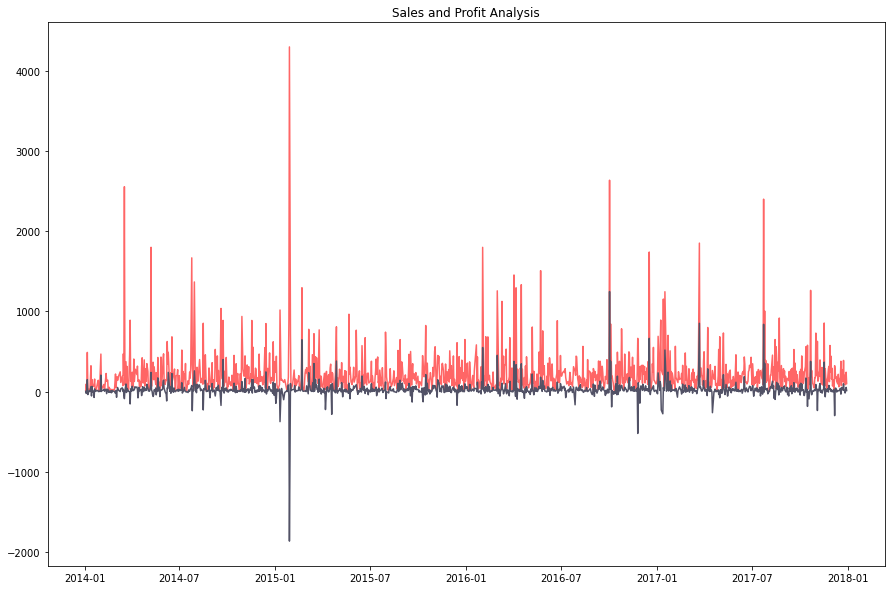

In [ ]:
plt.subplots(figsize = (15, 10))
plt.plot(trend.index, trend['Sales'], color = '#ff6666')
plt.plot(trend.index, trend['Profit'], color = '#525266')
plt.title('Sales and Profit Analysis')


In [ ]:
data = df.groupby('Year').mean().reset_index()
data.head()

,Year,Postal Code,Sales,Quantity,Discount,Profit
0,2014,56834.544405,242.974159,3.803813,0.158284,24.858994
1,2015,52905.921503,223.849909,3.795909,0.155609,29.314274
2,2016,54504.607654,235.487282,3.802474,0.154743,31.617771
3,2017,56186.515097,221.381418,3.766908,0.156467,28.212340


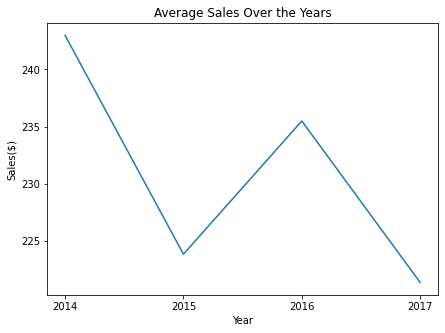

In [ ]:
#Average Sales 
fig, ax = plt.subplots(figsize = (7,5))
plt.plot(data['Year'], data['Sales'])
plt.xticks(data['Year'])
plt.title('Average Sales Over the Years')
plt.xlabel('Year')
plt.ylabel('Sales($)')
plt.show()

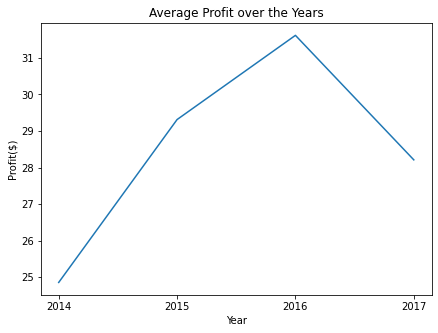

In [ ]:
#Average Profit
fig, ax = plt.subplots(figsize = (7,5))
plt.plot(data['Year'], data['Profit'])
plt.xticks(data['Year'])
plt.title('Average Profit over the Years')
plt.xlabel('Year')
plt.ylabel('Profit($)')
plt.show()

# Category

In [ ]:
#Pie chart prep
cat = df[['Category','Sales','Profit']]
cat = cat.groupby('Category').sum().reset_index()
cat.head()


,Category,Sales,Profit
0,Furniture,741999.7953,18451.2728
1,Office Supplies,719047.0320,122490.8008
2,Technology,836154.0330,145454.9481


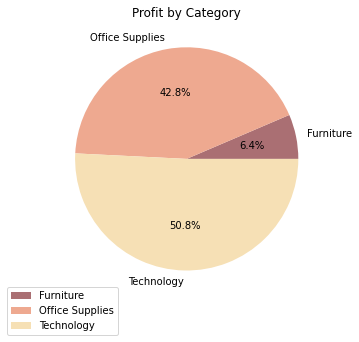

In [ ]:
#Pie Chart
plt.figure(figsize = [5,5])
plt.axis('equal')
plt.pie(cat['Profit'], labels = cat['Category'], colors = ['#aa6f73', '#eea990', '#f6e0b5'], autopct = '%1.1f%%')
plt.title('Profit by Category')
plt.legend(bbox_to_anchor=(0,0), loc="lower left", bbox_transform=plt.gcf().transFigure)
plt.show()


Office Supplies is the most purchased category of item


In [ ]:
#Bar chart prep
df_catbar = df[['Category','Sales']]
df_catbar = df_catbar.groupby('Category').mean().sort_values(by='Sales', ascending=False)
df_catbar.head()

,Sales
Category,
Technology,452.709276
Furniture,349.834887
Office Supplies,119.324101


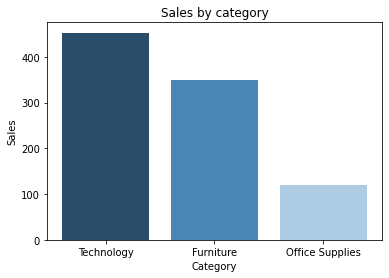

In [ ]:
#Bar chart
plt.bar(df_catbar.index, height = 'Sales', color = ['#2a4d69', '#4b86b4', '#adcbe3'], data = df_catbar)
plt.title('Sales by category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()


Technology contributes the highest amount of sales among all other categories.
Hence, we can focus more on technology and try to reduce the amount of furniture sold

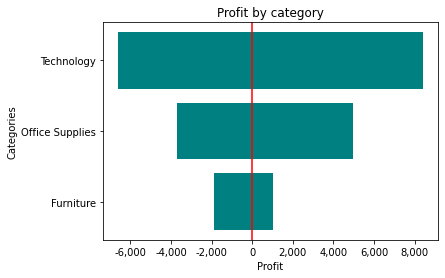

In [ ]:
#Horizontal Bar
fig, ax = plt.subplots()
plt.barh(df['Category'], df['Profit'],  color = 'teal')
plt.title('Profit by category')
plt.xlabel('Profit')
plt.ylabel('Categories')
plt.axvline(x=0, color = 'r')

ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.show()

# Region



In [ ]:
df.Region.unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

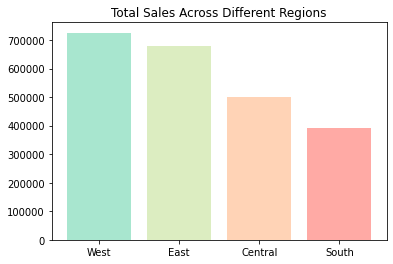

In [ ]:
#Sales Across Region
df_bar = df[['Region','Sales']]
df_bar = df_bar.groupby('Region').sum().sort_values(by='Sales', ascending=False)

plt.bar(x = df_bar.index, height = 'Sales', color=['#a8e6cf', '#dcedc1',	'#ffd3b6',	'#ffaaa5',	'#ff8b94'], data = df_bar)
plt.title('Total Sales Across Different Regions')
plt.show()

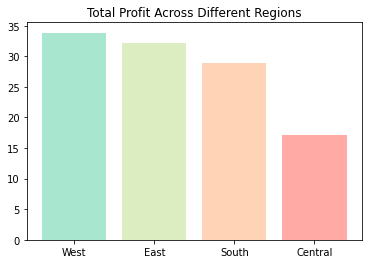

In [ ]:
#Region Profit
df_bar = df[['Region','Profit']]
df_bar = df_bar.groupby('Region').mean().sort_values(by='Profit', ascending=False)

plt.bar(x=df_bar.index, height='Profit', color=['#a8e6cf', '#dcedc1',	'#ffd3b6',	'#ffaaa5',	'#ff8b94'], data = df_bar)
plt.title('Total Profit Across Different Regions')
plt.show()

# Segment 

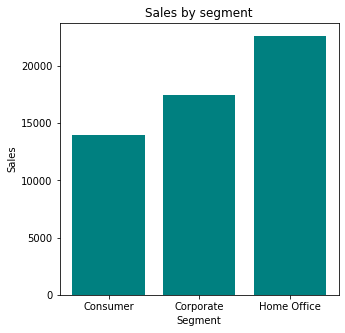

In [ ]:
#Sales per segment Random draft (UNUSED)
fig = plt.figure(figsize = (5,5))
plt.bar(df['Segment'], df['Sales'], color = ['teal'])
plt.title('Sales by segment')
plt.xlabel('Segment')
plt.ylabel('Sales')

#Formatter for Comma
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.show()


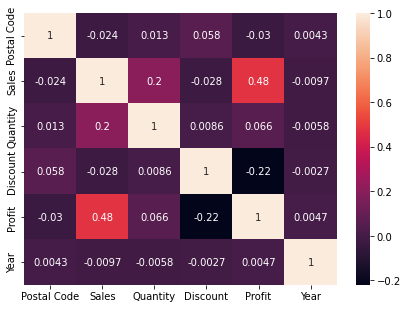

In [ ]:
#Correlation Matrix
fig, ax = plt.subplots(figsize=(7,5))  
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

Discount actually hurts profit maximizing potential

# LINEAR REGRESSION




In [ ]:
from sklearn.model_selection import train_test_split

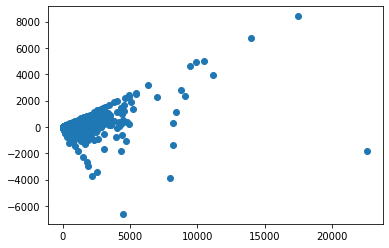

In [ ]:
plt.scatter(df['Sales'], df['Profit'])

In [ ]:
df.head()

,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year
0,11/8/2016,11/11/2016,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016
1,11/8/2016,11/11/2016,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016
2,6/12/2016,6/16/2016,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016
3,10/11/2015,10/18/2015,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015
4,10/11/2015,10/18/2015,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015


In [ ]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit,Year
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896,2015.722233
std,32063.693350,623.245101,2.225110,0.206452,234.260108,1.123555
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000,2014.000000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750,2015.000000
50%,56430.500000,54.490000,3.000000,0.200000,8.666500,2016.000000
75%,90008.000000,209.940000,5.000000,0.200000,29.364000,2017.000000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000,2017.000000


In [ ]:
x = df[['Sales', 'Quantity', 'Discount']]
y = df['Profit']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
print(model.intercept_)
print(model.coef_)

35.80484172859265
[ 1.59039498e-01 -1.85980699e+00 -2.42313572e+02]


Text(0.5, 0, 'Sales')

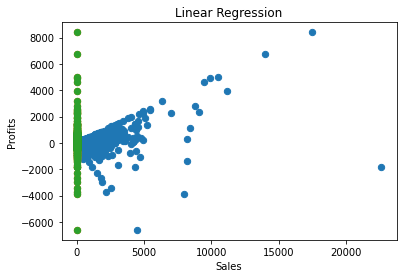

In [ ]:
#Since size of x and y are not equal, we go by col by col basis
for col in x.columns:
   plt.scatter(x[col], y, s=40)
plt.title('Linear Regression')
plt.ylabel('Profits')
plt.xlabel('Sales')

Linear Regression: 
  Y = 38.48 + 1.05 X1 - 8.68 X2 - 2.58 X3


